In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [7]:
df1 = pd.read_csv('mushrooms.csv')

In [8]:
df2 = df1.sample(frac = 1)

In [9]:
df2.shape

(8124, 23)

In [10]:
df3 = df1.sample(frac = 0.5)

In [11]:
df3.shape

(4062, 23)

In [12]:
df1.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [14]:
for label in df1.columns:
    df1[label] = LabelEncoder().fit(df1[label]).transform(df1[label])

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 8124 non-null   int32
 1   cap-surface               8124 non-null   int32
 2   cap-color                 8124 non-null   int32
 3   bruises                   8124 non-null   int32
 4   odor                      8124 non-null   int32
 5   gill-attachment           8124 non-null   int32
 6   gill-spacing              8124 non-null   int32
 7   gill-size                 8124 non-null   int32
 8   gill-color                8124 non-null   int32
 9   stalk-shape               8124 non-null   int32
 10  stalk-root                8124 non-null   int32
 11  stalk-surface-above ring  8124 non-null   int32
 12  stalk-surface-below-ring  8124 non-null   int32
 13  stalk-color-above-ring    8124 non-null   int32
 14  stalk-color-below-ring    8124 non-null 

In [17]:
df1.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


In [18]:
df1.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [19]:
X = df1.drop(['class'], axis = 1)
y = df1['class']

In [20]:
X.shape

(8124, 22)

In [24]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [26]:
y.shape

(8124,)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [28]:
X_train.shape

(5686, 22)

In [29]:
y_train.shape

(5686,)

In [30]:
X_test.shape

(2438, 22)

In [31]:
y_test.shape

(2438,)

## Entropy

In [106]:
model = DecisionTreeClassifier(criterion='entropy')

In [107]:
adaboost = AdaBoostClassifier(base_estimator=model, n_estimators=400, learning_rate=1)
boost_model = adaboost.fit(X_train, y_train)
y_pred = boost_model.predict(X_test)
predictions = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {predictions * 100} %")

Accuracy: 100.0 %


In [108]:
model.fit(X_train, y_train)
model.get_depth()

7


### Post pruning

In [109]:
model = DecisionTreeClassifier(criterion='entropy', random_state = 0)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

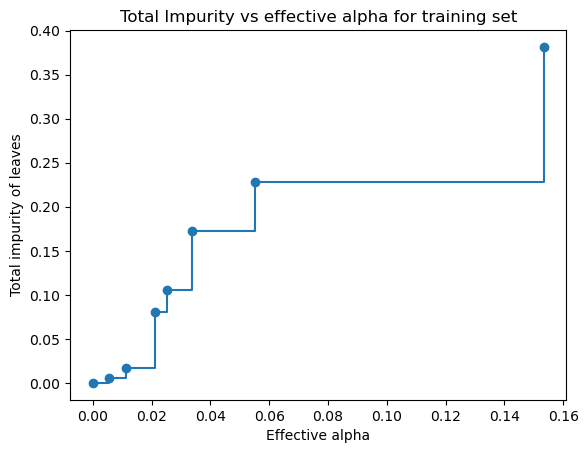

In [110]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [113]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    print(clf.get_depth())
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

7
6
6
3
3
3
3
1
0
Number of nodes in the last tree is: 1 with ccp_alpha: 0.3086829013993856


### Pre pruning

In [97]:
params = {
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}
model = DecisionTreeClassifier(random_state=0)
gscv = GridSearchCV(estimator=model, param_grid=params)
gscv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [115]:
model = gscv.best_estimator_
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {metrics.accuracy_score(y_train_pred, y_train)}')
print(f'Test score {metrics.accuracy_score(y_test_pred, y_test)}')


Train score 1.0
Test score 1.0


In [116]:
model.get_depth()

7

## GINI index

In [125]:
model = DecisionTreeClassifier(criterion='gini')

In [126]:
adaboost = AdaBoostClassifier(base_estimator=model, n_estimators=400, learning_rate=1)

In [127]:
boost_model = adaboost.fit(X_train, y_train)

In [128]:
y_pred = boost_model.predict(X_test)

In [129]:
predictions = metrics.accuracy_score(y_test, y_pred)

In [130]:
print(f"Accuracy: {predictions * 100} %")

Accuracy: 100.0 %


In [132]:
model.fit(X_train, y_train)
model.get_depth()

7

# Pipelining

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.datasets import make_classification

In [140]:
X, y = make_classification(n_samples = 1000, random_state = 0)

In [141]:
counter = Counter(y)

In [142]:
counter

Counter({0: 502, 1: 498})

In [143]:
X

array([[-1.06377997,  0.67640868,  1.06935647, ..., -0.35562842,
         1.05721416, -0.90259159],
       [ 0.0708476 , -1.69528125,  2.44944917, ...,  0.01708348,
        -0.37566904, -0.62323644],
       [ 0.94028404, -0.49214582,  0.67795602, ..., -0.06946407,
         1.35904607, -1.18958963],
       ...,
       [-0.5348271 , -0.74645927,  0.86505187, ..., -1.30657958,
         0.2509557 , -0.9348867 ],
       [-1.03042542, -0.29607249,  2.78034649, ...,  0.05398851,
        -0.14987096,  2.78960064],
       [ 0.54272502,  0.30821962,  0.20152656, ...,  1.09537374,
         0.12630589, -1.42647315]])

In [144]:
y

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,

In [145]:
models = list()

In [146]:
dt1 = Pipeline([('m', DecisionTreeClassifier())])
models.append(('decision', dt1))

In [147]:
rf1 = Pipeline([('m', RandomForestClassifier())])
models.append(('RandomForest', rf1))

In [149]:
svc = Pipeline([('m', SVC())])
models.append(('svc', svc))

In [150]:
ensemble = VotingClassifier(estimators = models, voting = 'hard')

In [151]:
models

[('decision', Pipeline(steps=[('m', DecisionTreeClassifier())])),
 ('RandomForest', Pipeline(steps=[('m', RandomForestClassifier())])),
 ('svc', Pipeline(steps=[('m', SVC())]))]

In [152]:
ensemble

VotingClassifier(estimators=[('decision',
                              Pipeline(steps=[('m',
                                               DecisionTreeClassifier())])),
                             ('RandomForest',
                              Pipeline(steps=[('m',
                                               RandomForestClassifier())])),
                             ('svc', Pipeline(steps=[('m', SVC())]))])

In [153]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [155]:
n_scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [156]:
n_scores

array([0.96, 0.94, 1.  , 1.  , 0.96, 0.94, 0.93, 0.98, 0.93, 0.96, 0.92,
       0.97, 0.95, 0.97, 0.98, 0.97, 0.92, 0.96, 0.99, 0.95, 0.97, 0.96,
       0.97, 0.97, 0.93, 0.94, 0.98, 0.96, 0.98, 0.96])